# Schleuniger Machine Learning Course

## Supervised Learning, Linear Regression

### Packages

In [72]:
import numpy as np
import matplotlib.pyplot as plt

### Data Preparation

In [73]:
n = 100
x = np.linspace(10,100,n)
e = np.random.normal(0, 30, x.shape[0])
y = 3 * x + e

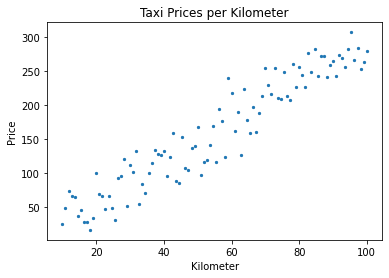

In [74]:
# make the plot
plt.scatter(x,y, s=5)
# axis naming
plt.title('Taxi Prices per Kilometer')
plt.ylabel('Price')
plt.xlabel('Kilometer')
plt.show()

### Fitting

In [75]:
m_array = np.linspace(2,4,50)

cost_list = []
for m in m_array:
    squared_residuals = (x * m - y)**2
    sum_of_squared_residuals = np.sum(squared_residuals, axis=0)
    cost = 1 / n * sum_of_squared_residuals
    cost_list.append(cost)

# find minimal cost index
index = np.argmin(cost_list)
# save the m with the lowest cost
m_best = m_array[index]

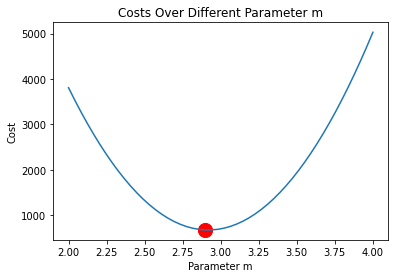

In [76]:
# Plot Cost over m's
plt.plot(m_array, cost_list)
# Plot minimal cost as a red dot
plt.scatter(m_best, cost_list[index],marker='o', c='red', s=200)
# axis naming
plt.ylabel('Cost')
plt.xlabel('Parameter m')
plt.title('Costs Over Different Parameter m')
plt.show()

In [77]:
# predict value with linear regression
y_prediction = x * m_best

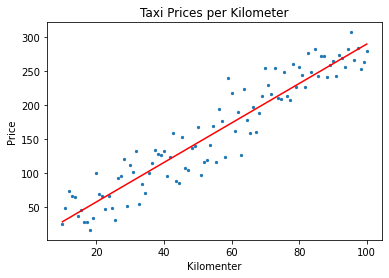

In [78]:
# make the plot
plt.scatter(x,y, s=5)
# plot the model
plt.plot(x,y_prediction, c='red')
# axis naming
plt.title('Taxi Prices per Kilometer')
plt.ylabel('Price')
plt.xlabel('Kilomenter')
plt.show()

### Model Selection

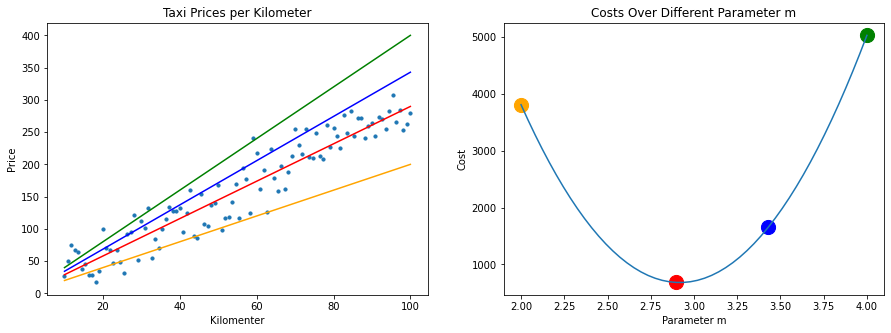

In [79]:
fig = plt.figure(figsize=(15,5)) 
ax = fig.add_subplot(121) 
ax.plot(x,x*m_best, c='red')
ax.plot(x,m_array[0]*x,c='orange')
ax.plot(x,m_array[-1]*x,c='green')
ax.plot(x,m_array[-15]*x,c='blue')
ax.scatter(x,y, s=10)
plt.title('Taxi Prices per Kilometer')
plt.ylabel('Price')
plt.xlabel('Kilomenter')
ax = fig.add_subplot(122)
ax.plot(m_array, cost_list)
ax.scatter(m_best, cost_list[index],marker='o', c='red', s=200)
ax.scatter(m_array[0], cost_list[0],marker='o', c='orange', s=200)
ax.scatter(m_array[-1], cost_list[-1],marker='o', c='green', s=200)
ax.scatter(m_array[-15], cost_list[-15],marker='o', c='blue', s=200)
plt.ylabel('Cost')
plt.xlabel('Parameter m')
plt.title('Costs Over Different Parameter m')
plt.show()

### Model Selection, Random Subset of the Data

In [80]:
m_array = np.linspace(2,4,50)
m_best_list = []
for i in range(20):
    np.random.seed(i)
    x_sub = np.random.choice(x, 20, replace=True)
    np.random.seed(i)
    y_sub = np.random.choice(y, 20, replace=True)
    cost_list = []
    for m in m_array:
        cost = 1 / n * np.sum((x_sub * m - y_sub)**2, axis=0)
        cost_list.append(cost)

    # find minimal cost index
    index = np.argmin(cost_list)
    # save the m with the lowest cost
    m_best = m_array[index]
    m_best_list.append(m_best)

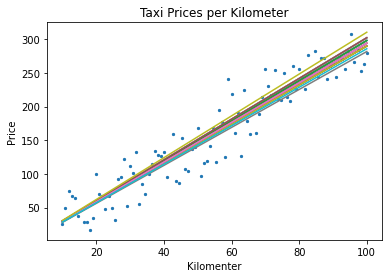

In [81]:
plt.scatter(x,y, s=5)
plt.title('Taxi Prices per Kilometer')
plt.ylabel('Price')
plt.xlabel('Kilomenter')
for m in m_best_list: 
    y_prediction = x * m
    plt.plot(x,y_prediction)
plt.show()

## Iris Data

The iris dataset contains the following data
- 50 samples of 3 different species of iris (150 samples total)
- Measurements: sepal length, sepal width, petal length, petal width
- The format for the data: (sepal length, sepal width, petal length, petal width)

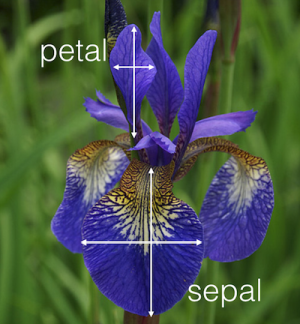

In [82]:
from IPython.display import Image
Image(filename='iris.png')

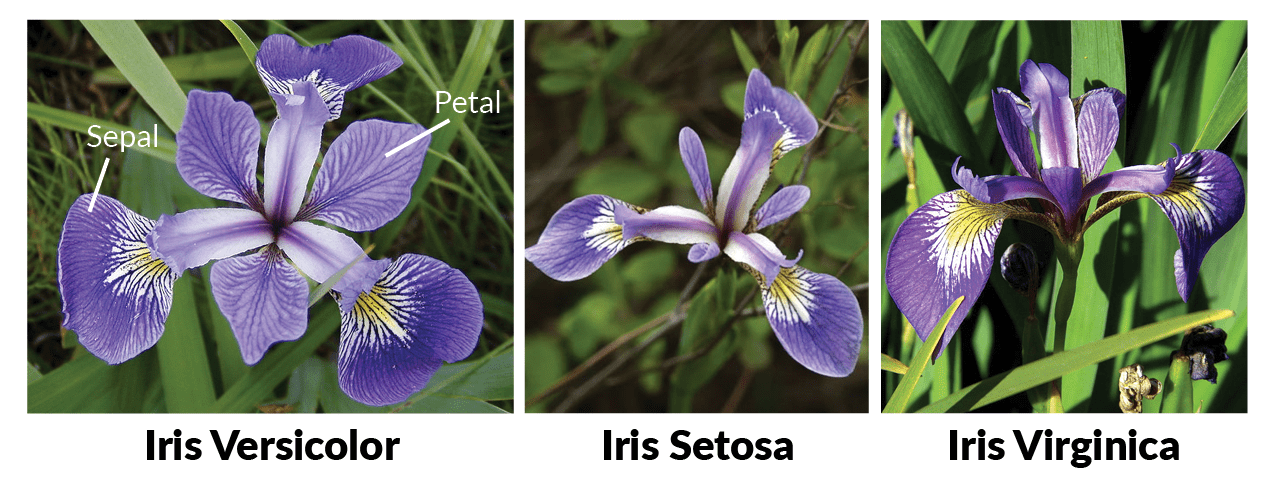

In [83]:
from IPython.display import Image
Image(filename='iris-all.png')

### Packages

In [84]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

### Load Data

In [85]:
dataset = load_iris()

### Data Preparation

In [86]:
# Create a Pandas DataFrame for plotting
iris_df = pd.DataFrame(dataset['data'],columns=['Petal length','Petal Width','Sepal Length','Sepal Width'])
iris_df['Species'] = dataset['target']
iris_df['Species'] = iris_df['Species'].apply(lambda x: dataset['target_names'][x])
# Seperate data and labels for fitting
iris_data = iris_df.iloc[:,:4]
iris_target = iris_df['Species'] 

### Plot Data

In [87]:
iris_df

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


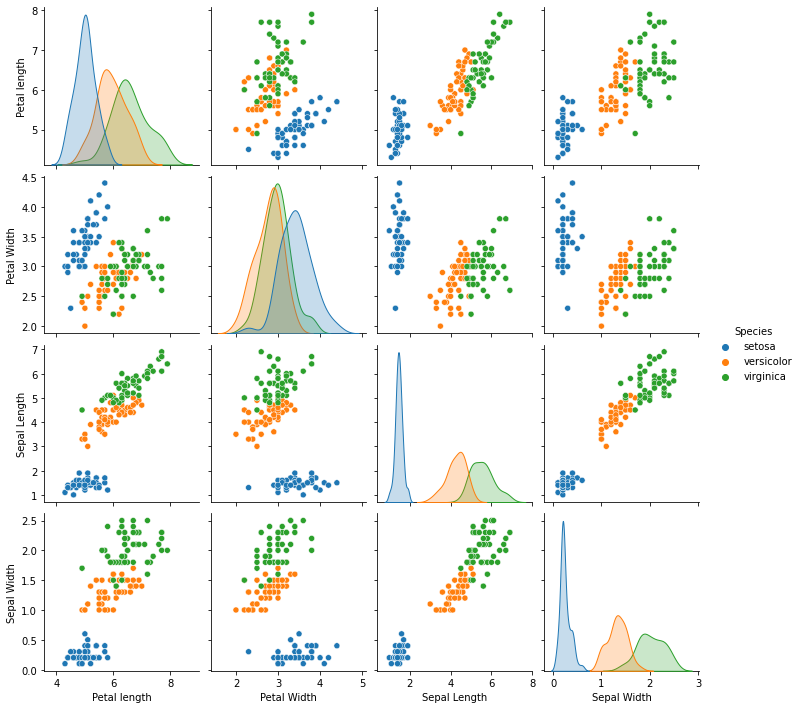

In [88]:
sns_plot = sns.pairplot(iris_df, hue="Species")

## Supervised Learning, Classification with Decision Trees

### Packages

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris

### Convenience Functions

In [90]:
def plot_decision_boundaries(clf_):
    """
    Loads the Iris Dataset and fits multiple classifier object from Scikit-Learn to the entire data.
    After fitting the learned decision boundaries are plotted.
    """
    # Parameters
    n_classes = 3
    plot_colors = "ryb"
    plot_step = 0.02

    # Load data
    iris = load_iris()

    fig, _axs = plt.subplots(nrows=2, ncols=3)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    axs = _axs.flatten()

    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Train
        clf_ = clf_.fit(X, y)

        # Plot the decision boundary
        fig.set_figheight(6)
        fig.set_figwidth(10)
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout()

        Z = clf_.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = axs[pairidx].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        axs[pairidx].set_xlabel(iris.feature_names[pair[0]])
        axs[pairidx].set_ylabel(iris.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            axs[pairidx].scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")

In [91]:
def plot_tree_iris(dt_clf):
    """
    Plots the tree of a fitted DecisionTreeClassifier object.
    """
    plt.figure(figsize=(10,10))
    plot_tree(dt_clf,
              filled=True,
              feature_names=['Petal length', 
                             'Petal Width', 
                             'Sepal Length', 
                             'Sepal Width',
                             'Species'],
              class_names=['setosa',
                           'versicolor',
                           'virginica']) 
    plt.show()

### Load Data

In [92]:
iris = load_iris()

### Fitting 1

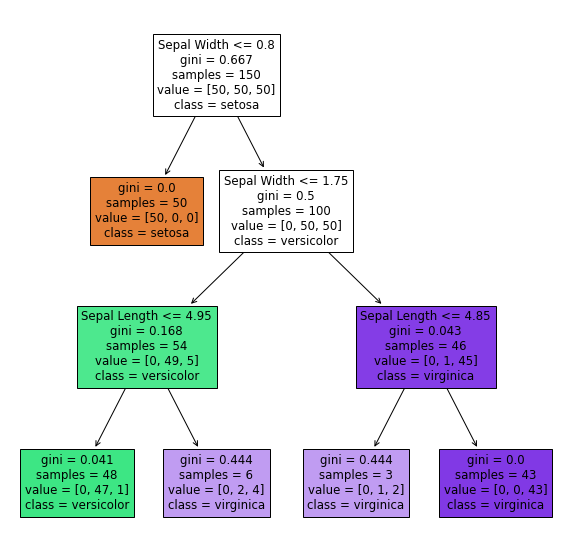

In [93]:
clf = DecisionTreeClassifier(random_state=12, max_depth=3)
clf.fit(iris.data, iris.target)

# Plot Tree
plot_tree_iris(clf)

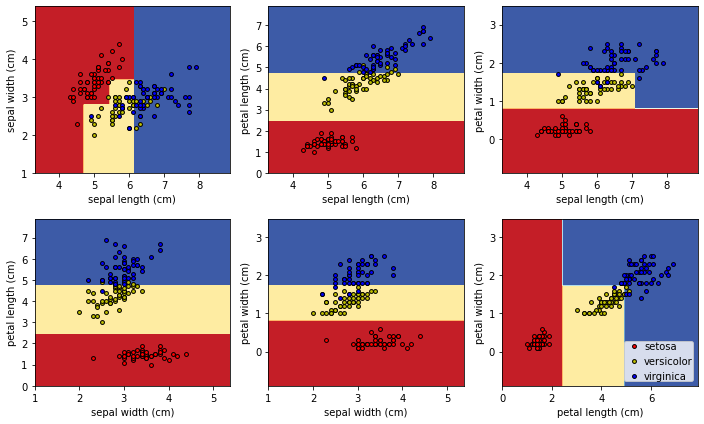

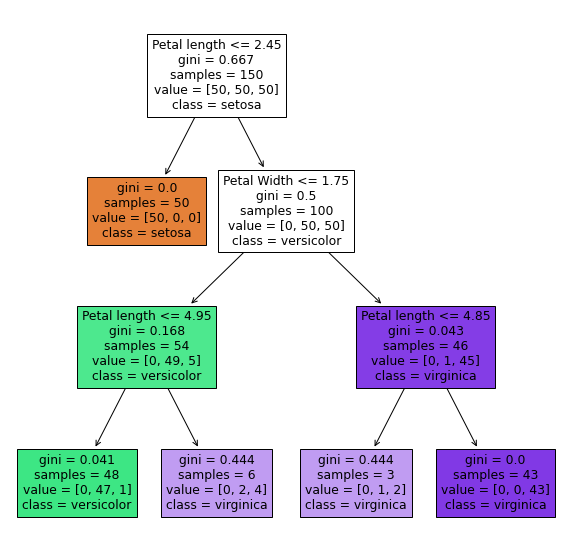

In [94]:
clf = DecisionTreeClassifier(random_state=12, max_depth=3)
plot_decision_boundaries(clf)
plot_tree_iris(clf)

## Supervised Learning, Classification with SVM

### Packages

In [95]:
from sklearn.svm import SVC

### Fitting 1

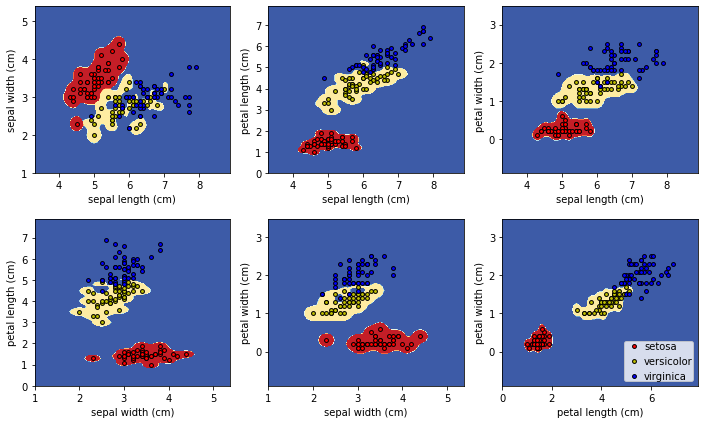

In [96]:
rbf_svc = SVC(kernel='rbf', gamma=50, C=10)
plot_decision_boundaries(rbf_svc)

### Fitting 2

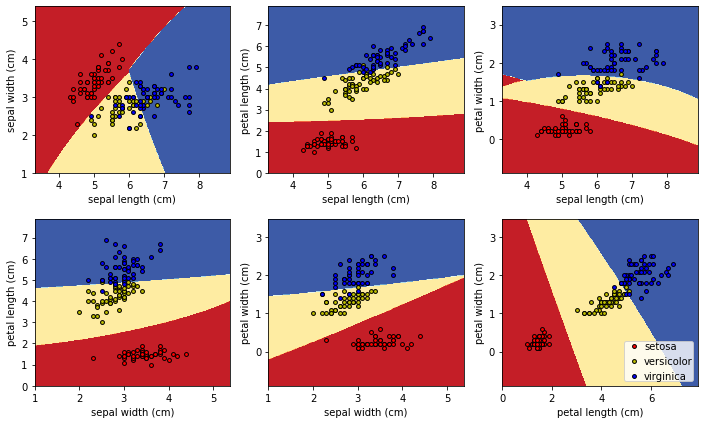

In [97]:
rbf_svc = SVC(kernel='rbf', gamma=0.1, C=2)
plot_decision_boundaries(rbf_svc)

## Unsupervised Learning, Clustering with K-Means

### Packages

In [98]:
from sklearn.cluster import KMeans

### Fitting 1

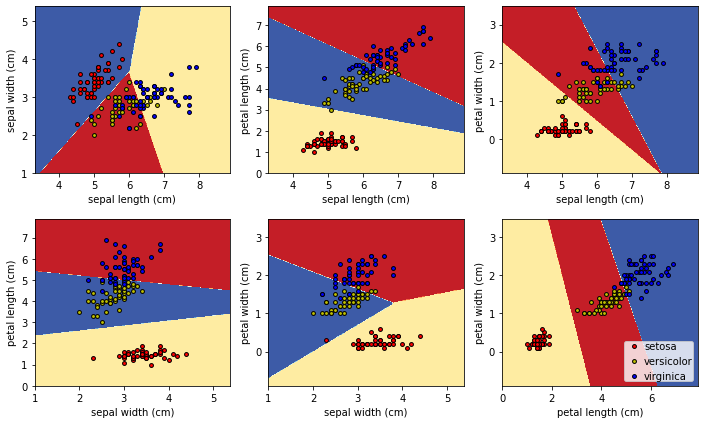

In [99]:
clustering = KMeans(n_clusters=3)
plot_decision_boundaries(clustering)

### Fitting 2

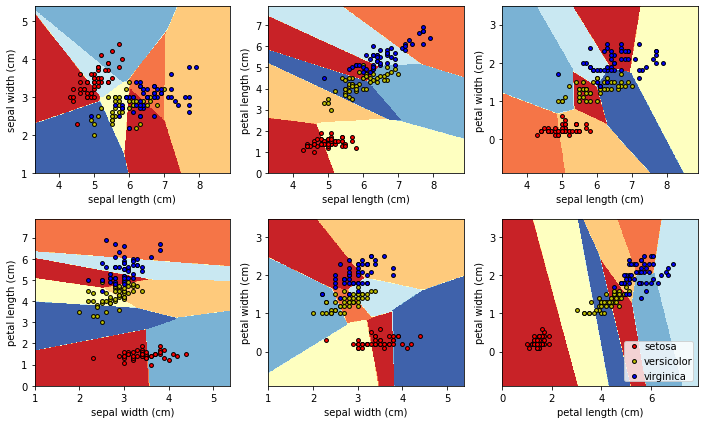

In [100]:
clustering = KMeans(n_clusters=8)
plot_decision_boundaries(clustering)

## Unsupervised Learning, Dimensionality Reduction

### Packages

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Load Data

In [102]:
iris = load_iris()

### Preprocessing

In [103]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)

### Fitting 1

In [104]:
scaler = StandardScaler()
try:
    mnist_pca = PCA(n_components=2)
    pc = mnist_pca.fit_transform(X_scaled)
    fig = plt.figure(figsize=(5,5))
    plt.scatter(pc[:,0],pc[:,1],c=iris.target, s=30)
    # axis naming
    plt.title('Unsupervised Dimensionality Reduction, PCA')
    plt.ylabel('Principle Component 1')
    plt.xlabel('Principle Component 2')
    plt.show()
except:
    print("Run again.")

Run again.


## Supervised Learning, Classification with Neural Network

### Packages

In [105]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Convenience Functions

In [106]:
def plot_decision_boundaries_neural_network():
    """
    Loads the Iris Dataset and fits multiple neural networks to the entire data.
    After fitting the learned decision boundaries are plotted.
    """
    # Parameters
    n_classes = 3
    plot_colors = "ryb"
    plot_step = 0.02

    # Load data
    iris = load_iris()
    # To one-hot-encoded
    _y = utils.to_categorical(iris.target)
    
    fig, _axs = plt.subplots(nrows=2, ncols=3)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    axs = _axs.flatten()

    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        _X = iris.data[:, pair]
        n_classes = 3
        
        # Train
        model = Sequential()
        model.add(Dense(150, input_shape=(2,)))
        model.add(Dense(n_classes, input_shape=(150,), activation='softmax'))
        model.summary()
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(_X, _y, batch_size=32, epochs=100, verbose=False)

        # Plot the decision boundary
        fig.set_figheight(6)
        fig.set_figwidth(10)
        x_min, x_max = _X[:, 0].min() - 1, _X[:, 0].max() + 1
        y_min, y_max = _X[:, 1].min() - 1, _X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout()

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        # From one-hot-encoded response to vector
        Z = np.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)
        cs = axs[pairidx].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        axs[pairidx].set_xlabel(iris.feature_names[pair[0]])
        axs[pairidx].set_ylabel(iris.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(iris.target == i)
            axs[pairidx].scatter(_X[idx, 0], _X[idx, 1], c=color, label=iris.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")

### Load Data

In [107]:
iris = load_iris()

### Preprocessing

In [108]:
# To one-hot-encoded
y = utils.to_categorical(iris.target)

### Fitting 1

In [109]:
number_of_epochs = 100
batch_size = 64

dimension_input = iris.data.shape[1]
n_classes = 3

#######################################################################################################

# Build a shallow neuronal network
model = Sequential()
model.add(Dense(150, input_shape=(4,)))
model.add(Dense(n_classes, input_shape=(150,), activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(iris_data,
                y,
                batch_size=batch_size,
                epochs=number_of_epochs,
                verbose=True)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 150)               750       
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 453       
Total params: 1,203
Trainable params: 1,203
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 0s 997us/step - loss: 1.3463 - accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 1ms/step - loss: 1.1410 - accuracy: 0.2667
Epoch 3/100
3/3 [==============================] - 0s 952us/step - loss: 1.1358 - accuracy: 0.5867
Epoch 4/100
3/3 [==============================] - 0s 1000us/step - loss: 1.0538 - accuracy: 0.6200
Epoch 5/100
3/3 [==============================] - 0s 1ms/step - loss: 0.9541 - accuracy: 0.5200
Epoch 6/100
3/3 [=====

3/3 [==============================] - 0s 776us/step - loss: 0.2151 - accuracy: 0.9733
Epoch 78/100
3/3 [==============================] - 0s 591us/step - loss: 0.2124 - accuracy: 0.9800
Epoch 79/100
3/3 [==============================] - 0s 1ms/step - loss: 0.2104 - accuracy: 0.9733
Epoch 80/100
3/3 [==============================] - 0s 905us/step - loss: 0.2066 - accuracy: 0.9733
Epoch 81/100
3/3 [==============================] - 0s 665us/step - loss: 0.2061 - accuracy: 0.9733
Epoch 82/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2038 - accuracy: 0.9733
Epoch 83/100
3/3 [==============================] - 0s 993us/step - loss: 0.1989 - accuracy: 0.9733
Epoch 84/100
3/3 [==============================] - 0s 999us/step - loss: 0.1969 - accuracy: 0.9867
Epoch 85/100
3/3 [==============================] - 0s 997us/step - loss: 0.1961 - accuracy: 0.9733
Epoch 86/100
3/3 [==============================] - 0s 647us/step - loss: 0.1918 - accuracy: 0.9733
Epoch 87/100
3/3 

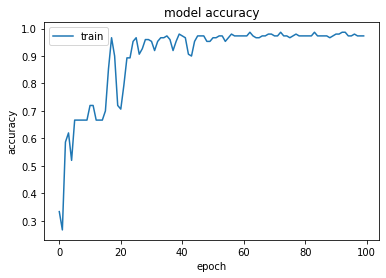

In [110]:
#import keras
history = log
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Fitting 2

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 150)               450       
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 453       
Total params: 903
Trainable params: 903
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 150)               450       
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 453       
Total params: 903
Trainable params: 903
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_11"
____________

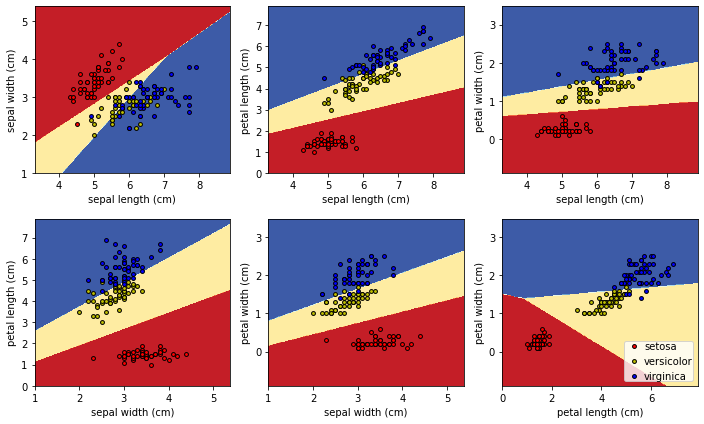

In [111]:
plot_decision_boundaries_neural_network()

## MNIST Dataset

### Packages

In [112]:
from tensorflow.keras.datasets import mnist

### Load Data

In [113]:
# loading MNIST Data, seperating in Training and Testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)

(60000, 28, 28)


### Plotting Data

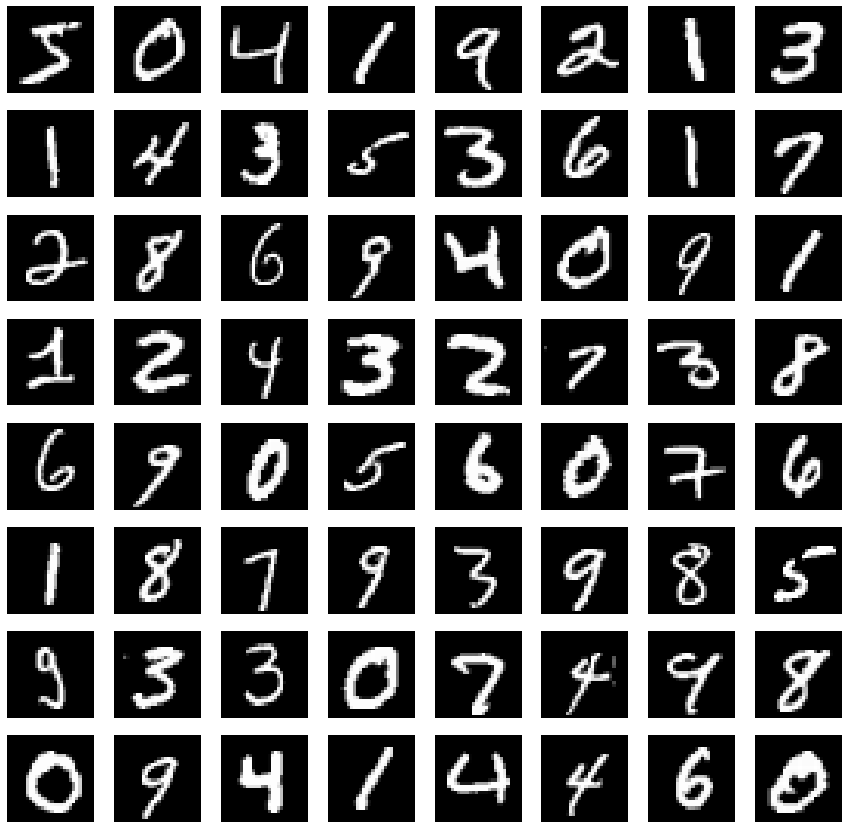

In [114]:
nrow = 8
ncol = 8
fig, _axs = plt.subplots(nrows=nrow, ncols=ncol)
fig.set_figheight(15)
fig.set_figwidth(15)
axs = _axs.flatten()
for i in range(nrow * ncol):
    axs[i].imshow(X_train[i], cmap='gray')
    axs[i].axis('off')

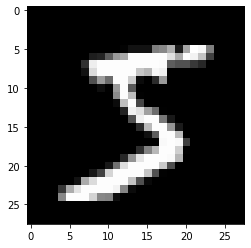

This picture is labelled as number:  5


In [115]:
# Plot the first image from the training data
plt.imshow(X_train[0], cmap='gray')
plt.show()
# Check if the number is correctly labled
print('This picture is labelled as number: ', y_train[0])

## Supervised Learning, Classification with Neural Network

### Packages

In [116]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Preprocessing

In [117]:
# Preparing Data
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalize pixel values to [0,1]
X_train /= 255.0
X_test /= 255.0

n_classes = 10

Y_train = utils.to_categorical(y_train)
Y_test = utils.to_categorical(y_test)

### Fitting 1

In [ ]:
number_of_epochs = 20
batch_size = 128

dimension_input = X_train.shape[1]

# Build a shallow neuronal network witch 1500 hidden units
model = Sequential()
model.add(Dense(1500, input_shape=(784,)))
model.add(Dense(n_classes, input_shape=(1500,), activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(X_train,
                Y_train,
                batch_size=batch_size,
                epochs=number_of_epochs,
                verbose=True,
                validation_data=(X_test, Y_test))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 1500)              1177500   
_________________________________________________________________
dense_31 (Dense)             (None, 10)                15010     
Total params: 1,192,510
Trainable params: 1,192,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3648 - accuracy: 0.8945 - val_loss: 0.3142 - val_accuracy: 0.9144
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3050 - accuracy: 0.9149 - val_loss: 0.2954 - val_accuracy: 0.9194
Epoch 3/20
 22/469 [>.............................] - ETA: 3s - loss: 0.2880 - accuracy: 0.9197

### Plot Learning Curve 1

In [ ]:
#import keras
history = log
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Fitting 2

In [ ]:
number_of_epochs = 20
batch_size = 128

dimension_input = X_train.shape[1]

# Build a MLP
model = Sequential()
model.add(Dense(n_classes, input_shape=(784,), activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(X_train,
                Y_train,
                batch_size=batch_size,
                epochs=number_of_epochs,
                verbose=True,
                validation_data=(X_test, Y_test))

### Plot Learning Curve 1

In [ ]:
#import keras
history = log
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()